In [1]:
%%time

!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.8 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=fc7629cb3255ad28bf49ee17c660ab3375e0804bfe910bd9753d03504727e42b
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
CPU times: user 901 ms, sys: 175 ms, total: 1.08 s
Wall time: 41.3 s


In [2]:
%%time

!pip install openai-whisper googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=c0eb0e563d4d8c453de7653e95d0fb5eda73e0b0a2562d5894a3dea3bd75cd86
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11

In [3]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 49 µs, sys: 10 µs, total: 59 µs
Wall time: 63.4 µs


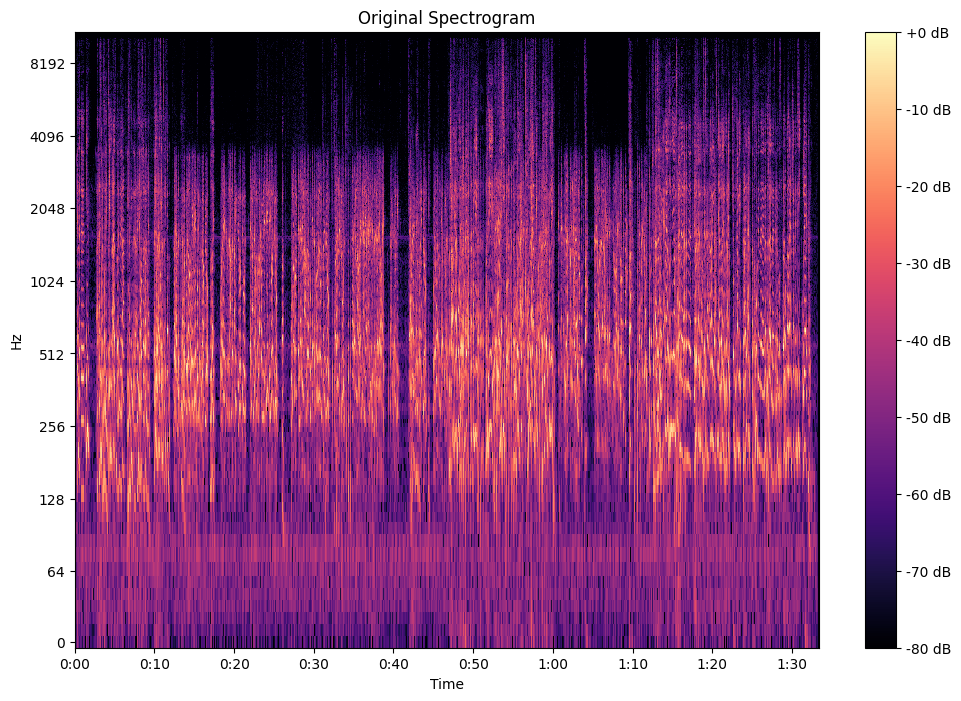

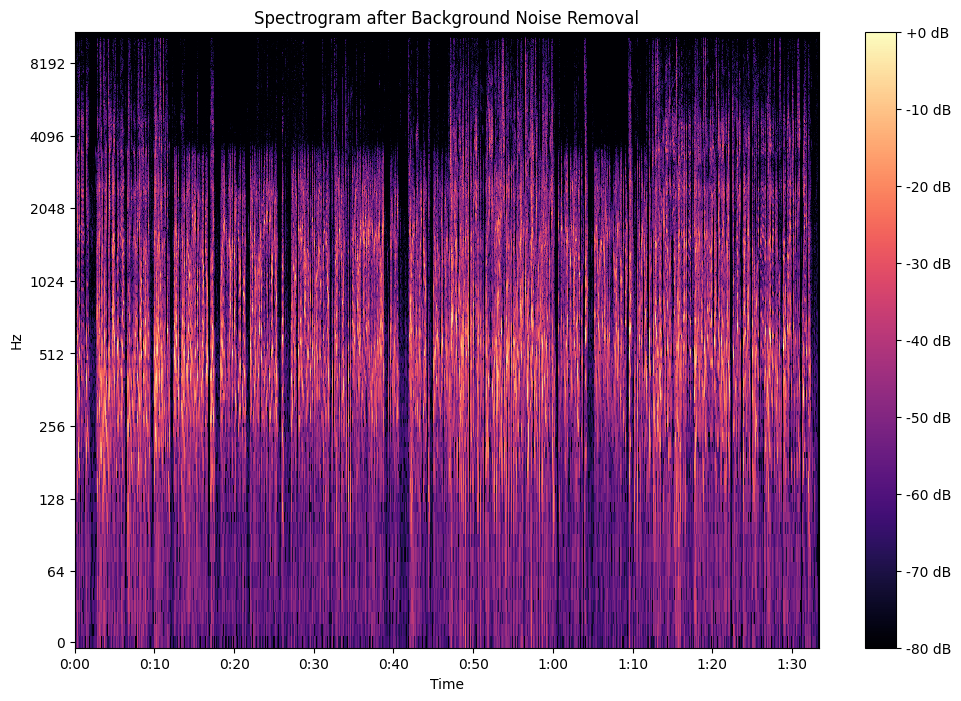

CPU times: user 30 s, sys: 1.54 s, total: 31.5 s
Wall time: 34.7 s


In [4]:
%%time

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Load the audio file
audio_file_path = "/kaggle/input/arabic-natural-audio-dataset/V2.wav"

# Replace with the path to your audio file
y, sr = librosa.load(audio_file_path)

# Display the original spectrogram
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.show()

# Apply background noise removal
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_noise_removed = y - y_harmonic

# Display the spectrogram after background noise removal
D_noise_removed = librosa.amplitude_to_db(np.abs(librosa.stft(y_noise_removed)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_noise_removed, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram after Background Noise Removal')
plt.show()

In [5]:
%%time

import whisper

# Load the Whisper model
model = whisper.load_model('base')

# Load and transcribe the audio file
audio_file = y_noise_removed
text = model.transcribe(audio_file)

# Print the transcribed text
text['text']

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 64.7MiB/s]


CPU times: user 2min 31s, sys: 1.78 s, total: 2min 33s
Wall time: 1min 22s


' معِ وانه يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن ي يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن 

In [6]:
%%time

print(text)

{'text': ' معِ وانه يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن ي يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أن يجب أ

In [7]:
%%time

result = model.transcribe(audio_file, language='ar')

CPU times: user 2min 29s, sys: 849 ms, total: 2min 30s
Wall time: 1min 15s


In [8]:
%%time

result

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


{'text': ' من من هنسماك تسليد سعيد محلد فضم من جمع المشاهدين عزية تلسوات فعلهم على سعيد محلد سعيد سعيد فضم ونقوم بحقات المحلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد سعيد محلد س سعيد محلد سعيد محلد سعيد محلد سعيد محلد محلد سعيد محلد سعيد ampliD انشت سا اتبدا وانا اعملت الزنطي وانا بس قول عدمة رانعا اذا رب خاريت الماء والمسيساتها انا رأي الحسد على الدغمية بكتبع منه شوفني بكتبع بني ونمع لك اللي هل أنا فحور بك لما كتبشتنة في عالم المقصي وذن مكتبت لعاد بشتنة في بسي ونيرف يقفق',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 16.72,
   'text': ' من من هنسماك تسليد سعيد محلد فضم من جمع المشاهدين عزية تلسوات فعلهم على سعيد محلد سعيد سعيد فضم',
   'tokens': [50364,
    9154,
    9154,
    8032,
    1863,
    3794,
    15042,
    41

In [9]:
%%time

from googletrans import Translator
import whisper

# Load Whisper model
model = whisper.load_model('base')

# Transcribe the audio
audio_file = "/kaggle/input/arabic-natural-audio-dataset/V2.wav"
result = model.transcribe(audio_file)

# Translate the transcribed text into English
transcribed_text = result.get('text')
if transcribed_text:
    translator = Translator()
    translated_result = translator.translate(transcribed_text, dest='en')

# Print the translated text
    print("Translated Text:", translated_result.text)
else:
    print("Error: Transcription result is empty. Cannot proceed with translation.")

Translated Text: Because whoever we will hear the connections are happy from the locality of Fadl, because Friday, the viewers are highThe one who is enemy with a bit is a bit of you with the consent of them, among whom the lengths of the remnants, and most of us are the remnants.The defect, and all the defect,A man, my account on the program that I was doing, see me, as it was done, and we are with us all the world. I am proud that we will work in the Egyptian world instead
CPU times: user 52.5 s, sys: 695 ms, total: 53.2 s
Wall time: 29.3 s
